# Logistic Regression

Logistic regression is a classification method. Its main goal is learning a function that __returns a yes or no answer__
when presented as input a so-called __feature__ vector. 

As an example, suppose we are given a dataset, such as the one below:

| Class| Feature1 | Feature2  |
|---| |---|
| 0 |5.7| 3.1|
| 1|-0.3|2 |
|---| |---|
|  $y_i$| $x_{i,1}$ | $x_{i,2}$ |
|---| |---|
| 1|0.4|5 |

The goal is learning to predict the labels of a future dataset, where we are given only the features but not the labels:

| Class| Feature1 | Feature2  |
|---| |---|
| ? |4.8| 3.2|
| ? |-0.7|2.4 |
|---| |---|

More formally, the dataset consists of $N$ feature vectors $x_i$ and the associated labels $y_i$ for each example $i=1\dots N$. The entries of $y$ are referred typically as class labels -- but in reality $y$ could model any answer to a true-false question, such as 'is object $i$ a flower?' or 'will customer $i$ buy product $j$ during the next month?'. We can arrange the features in a matrix $X$ and the labels in a vector $y$:

\begin{eqnarray}
X & = &  \begin{pmatrix}
  x_{1,1} & x_{1,2} & \dots & x_{1,D} \\
  x_{2,1} & x_{2,2} & \dots & x_{2,D} \\
  \vdots & \vdots & \vdots & \vdots  \\
  x_{i,1} & x_{i,2} & \dots & x_{i,D}  \\
  \vdots & \vdots & \vdots & \vdots  \\
  x_{N,1} & x_{N,2} & \dots & x_{N,D} \\
\end{pmatrix} = 
\begin{pmatrix}
x_1^\top \\
x_2^\top \\
\dots \\
x_i^\top \\
\dots \\
x_N^\top
\end{pmatrix} 
\\
{y} & = & \begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_i \\
\vdots \\
y_N
\end{pmatrix}
\end{eqnarray}
where $x_{i,j}$ denotes the $j$'th feature of the $i$'th data point. 

It is common, to set a column of $X$ entirely to $1$'s, for example we take $x_{i,D}=1$ for all $i$. This 'feature' is artificially added to the dataset to allow a slightly more flexible model -- even if we don't measure any feature, the relative numbers of ones and zeros in a dataset can provide a crude estimate of the probability of a true or false answer. 

Logistic Regression is a method that can be used to solve binary classification problems, like the one above. 
We will encode the two classes as $y_i \in \{0,1\}$.  The key idea is learning a mapping from a feature vector $x$ to a probability, a number between $0$ and $1$. 

The generative model is 
$$
\Pr\{y_i = 1\} = \pi_i = \sigma(x_i^\top w)
$$
Here,
$\sigma(x)$ is the sigmoid function defined as
\begin{eqnarray}
\sigma(x) & = & \frac{1}{1+e^{-x}}
\end{eqnarray}

To understand logistic regression as a generative model, consider the following metaphor: assume that for each data instance $x_i$, we select a biased coin with probability $p(y_i = 1| w, x^\top_i) = \pi_i = \sigma(x_i^\top w)$, throw the coin and label the data item with class $y_i$ accordingly. 

Mathematically, we assume that each label $y_i$, or more precisely the answer to our yes-no question rearding the object $i$ with feature vector $w$ is drawn from a Bernoulli distribution. That is: 
\begin{eqnarray}
\pi_i & = & \sigma(x_i^\top w) \\
y_i & \sim &\mathcal{BE}(\pi)
\end{eqnarray}

Here, we think of a biased coin with two sides denoted as $H$ (head) and $T$ (tail) with probability of side $H$ as $\pi$, and consequently the probability of side $T$ with $1-\pi$. 

We denote the outcome of the coin toss with the random variable $y \in \{0, 1\}$. 

For each throw $i$, $y_i$ is the answer to the question 'Is the outcome heads?'. We write the probability as $p(y = 1) = \pi$ and probability of tails is $p(y = 0) = 1-\pi$. More compactly, the probability of the outcome of a toss, provided we know $\pi$, is written as
\begin{eqnarray}
p(y|\pi) = \pi^y(1-\pi)^{1-y}
\end{eqnarray}

### Maximum Likelihood

Maximum likelihood (ML) is a method for choosing the unknown parameters of a probability distribution, given some data that is assumed to be drawn from this distribution. The distribution itself is referred as the probability model, or often just the model.

#### Example
Suppose we are given only $5$ outcomes when a coin is thrown:
$$
H, T, H, T, T
$$

What is the probabilty that the outcome is, say heads $H$ if we know that the coin is biased ?.

One reasonable answer may be the frequency of heads, $2/5$.

The ML solution coincides with this answer. For a derivation, 
we define $y_i$ for $i = 1,2,\dots, 5$ as

$$
y_i  = \left\{ \begin{array}{cc} 1 & \text{coin $i$ is H} \\ 0 & \text{coin $i$ is T}  \end{array} \right. 
$$
hence 
$$
y = [1,0,1,0,0]^\top
$$

If we assume that the outcomes were independent, the probability of observing the above sequence as a function of the parameter $\pi$ is the product of each individual probability
$$
\Pr\{y = [1,0,1,0,0]^\top\} = \pi \cdot (1-\pi) \cdot \pi \cdot (1-\pi) \cdot(1-\pi) 
$$

We could try finding the $\pi$ value that maximizes this function. We will call the corresponding value as the maximum likelhood solution, and denote it as $\pi^*$. 

It is often more convenient to work with the logarithm of this function, known as the loglikelihood function.

$$
\mathcal{L}(\pi) = 2 \log \pi + 3 \log (1-\pi)
$$
For finding the maximum, we take the derivative with respect to $\pi$ and set to zero.
$$
\frac{d \mathcal{L}(\pi)}{d \pi} = \frac{2}{\pi^*} -  \frac{3}{1-\pi^*} = 0 
$$
When we solve we obtain $$ \pi^* = \frac{2}{5} $$

More generally, when we observe $y_i$ for $i=1 \dots N$, the loglikelihood is

\begin{eqnarray}
\mathcal{L}(\pi)& = & \log \left(\prod_{i : y_i=1} \pi \right) \left(\prod_{i : y_i=0}(1- \pi) \right) \\
& = & \log \prod_{i = 1}^N \pi^{y_i} (1- \pi)^{1-y_i} \\
& = & \log  \pi^{ \sum_i y_i} (1- \pi)^{\sum_i (1-y_i) } \\
& = & \left(\sum_i y_i\right) \log \pi + \left(\sum_i (1-y_i) \right) \log (1- \pi) 
\end{eqnarray}

If we define the number of observed $0$'s and $1$'s by $c_0$ and $c_1$ respectively, we have 

\begin{eqnarray}
\mathcal{L}(\pi)& = & c_1 \log \pi + c_0 \log (1- \pi) 
\end{eqnarray}

Taking the derivative and setting to $0$ results in

$$
\pi^* = \frac{c_1}{c_0+c_1} = \frac{c_1}{N} 
$$



In [2]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import clear_output, display, HTML
from matplotlib import rc

import scipy as sc
import scipy.optimize as opt

mpl.rc('font',**{'size': 20, 'family':'sans-serif','sans-serif':['Helvetica']})
mpl.rc('text', usetex=True)


In [3]:

def sigmoid(x):
    return 1/(1+np.exp(-x))

def dsigmoid(x):
    s = sigmoid(x)
    return s*(1-s)

def inv_sigmoid(p=0.5):
    xs = opt.bisect(lambda x: sigmoid(x)-p, a=-100, b=100)
    return xs

def inv_sigmoid1D(w, b, p=0.5):
    xs = opt.bisect(lambda x: sigmoid(w*x+b)-p, a=-100, b=100)
    return xs
    

### Plotting the Sigmoid

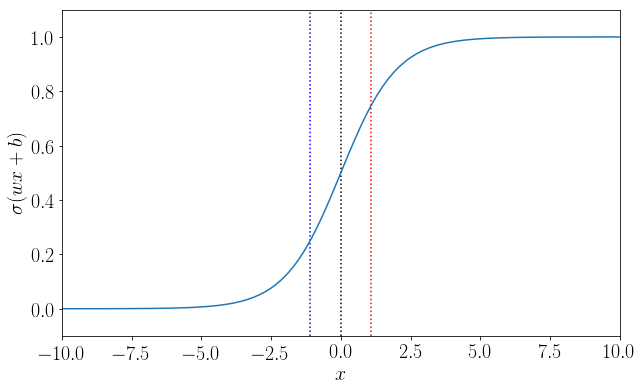

In [4]:
  
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
ax.set_ylim([-0.1,1.1])
x = np.linspace(-10,10,100)
ax.set_xlim([-10,10])

ln = plt.Line2D(x, sigmoid(x))
ln2 = plt.axvline([0], ls= ':', color='k')
ln_left = plt.axvline([0], ls= ':', color='b')
ln_right = plt.axvline([0], ls= ':', color='r')

ax.add_line(ln)
plt.close(fig)
ax.set_xlabel('$x$')
ax.set_ylabel('$\sigma(wx + b)$')

def plot_fun(w=1, b=0):
    ln.set_ydata(sigmoid(w*x+b))
    if np.abs(w)>0.00001:
        ln2.set_xdata(inv_sigmoid1D(w,b,0.5))
        ln_left.set_xdata(inv_sigmoid1D(w,b,0.25))
        ln_right.set_xdata(inv_sigmoid1D(w,b,0.75))
    display(fig)
    
res = interact(plot_fun, w=(-5, 5, 0.1), b=(-10.0,10.0,0.1)) 

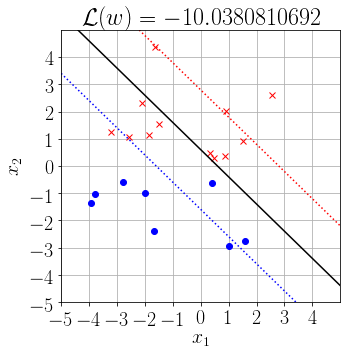

In [5]:


def LR_loglikelhood(X, y, w):
    tmp = X.dot(w)
    return y.T.dot(tmp) - np.sum(np.log(np.exp(tmp)+1))

w = np.array([0.5, 2, 3])

D = 3
N = 20
# Some random features
X = 2*np.random.randn(N,D)
X[:,0] = 1

# Generate class labels
pi = sigmoid(np.dot(X, w))
y = np.array([1 if u else 0 for u in np.random.rand(N) < pi]).reshape((N))


xl = -5.
xr = 5.
yl = -5.
yr = 5.


fig = plt.figure(figsize=(5,5))

plt.plot(X[y==1,1],X[y==1,2],'xr')
plt.plot(X[y==0,1],X[y==0,2],'ob')

ax = fig.gca()
ax.set_ylim([yl, yr])
ax.set_xlim([xl, xr])

ln = plt.Line2D([],[],color='k')
ln_left  = plt.Line2D([],[],ls= ':', color='b')
ln_right = plt.Line2D([],[],ls= ':', color='r')

ax.add_line(ln)
ax.add_line(ln_left)
ax.add_line(ln_right)
plt.close(fig)
ax.set_xlabel('$x_1$')
#ax.grid(xdata=np.linspace(xl,xr,0.1))
#ax.grid(ydata=np.linspace(yl,yr,0.1))
ax.set_ylabel('$x_2$')
ax.set_xticks(np.arange(xl,xr))
ax.set_yticks(np.arange(yl,yr))
ax.grid(True)
def plot_boundry(w0,w1,w2):
    if w1 != 0:
        xa = -(w0+w2*yl)/w1
        xb = -(w0+w2*yr)/w1
        ln.set_xdata([xa, xb])
        ln.set_ydata([yl, yr])

        xa = -(-inv_sigmoid(0.25) + w0+w2*yl)/w1
        xb = -(-inv_sigmoid(0.25) + w0+w2*yr)/w1
        ln_left.set_xdata([xa, xb])
        ln_left.set_ydata([yl, yr])

        xa = -(-inv_sigmoid(0.75) + w0+w2*yl)/w1
        xb = -(-inv_sigmoid(0.75) + w0+w2*yr)/w1
        ln_right.set_xdata([xa, xb])
        ln_right.set_ydata([yl, yr])
        
        
    elif w2!=0:
        ya = -(w0+w1*xl)/w2
        yb = -(w0+w1*xr)/w2
        ln.set_xdata([xl, xr])
        ln.set_ydata([ya, yb])

        ya = -(-inv_sigmoid(0.25) + w0+w1*xl)/w2
        yb = -(-inv_sigmoid(0.25) + w0+w1*xr)/w2
        ln_left.set_xdata([xl, xr])
        ln_left.set_ydata([ya, yb])

        ya = -(-inv_sigmoid(0.75) + w0+w1*xl)/w2
        yb = -(-inv_sigmoid(0.75) + w0+w1*xr)/w2
        ln_right.set_xdata([xl, xr])
        ln_right.set_ydata([ya, yb])      
        
    else:
        ln.set_xdata([])
        ln.set_ydata([])
        
    ax.set_title('$\mathcal{L}(w) = '+str(LR_loglikelhood(X, y, np.array([w0, w1, w2])))+'$')
    display(fig)

res = interact(plot_boundry, w0=(-3.5, 3, 0.1), w1=(-3.,4,0.1), w2=(-3.,4,0.1)) 

### Logistic Regression: Learning the parameters

The logistic regression model is very similar to the coin model. The main difference is that for each example $i$, we use a specific coin with a probability $\sigma(x_i^\top w)$ that depends on the specific feature vector $x_i$ and the parameter vector $w$ that is shared by all examples. The likelihood of the observations, that is the probability of observing the class sequence is

$\begin{eqnarray}
p(y_1, y_2, \dots, y_N|w, X ) &=& \left(\prod_{i : y_i=1} \sigma(x_i^\top w) \right) \left(\prod_{i : y_i=0}(1- \sigma(x_i^\top w)) \right)
\end{eqnarray}
$

Here, the left product is the expression for examples from class $1$ and the right product is for examples from class $0$.
We will look for the particular setting of the weight vector, the maximum likelihood solution, denoted by $w^*$.

$
\begin{eqnarray}
w^* & = & \arg\max_{w} {\cal L}(w)
\end{eqnarray}
$

where the loglikelihood function

$
\begin{eqnarray}
{\cal L}(w) & = & \log p(y_1, y_2, \dots, y_N|w, x_1, x_2, \dots, x_N ) \\
& = & \sum_{i : y_i=1} \log \sigma(x_i^\top w) + \sum_{i : y_i=0} \log (1- \sigma(x_i^\top w)) \\
& = & \sum_{i : y_i=1} x_i^\top w - \sum_{i : y_i=1} \log(1+e^{x_i^\top w}) - \sum_{i : y_i=0}\log({1+e^{x_i^\top w}}) \\
& = & \sum_i y_i x_i^\top w - \sum_{i} \log(1+e^{x_i^\top w}) \\
& = & y^\top X w - \mathbf{1}^\top \text{logsumexp}(0, X w)
\end{eqnarray}
$

$\mathbf{1}$ is a vector of ones; note that when we premultiply a vector $v$ by $\mathbf{1}^T$ we get the sum of the entries of $v$, i.e. $\mathbf{1}^T v = \sum_i v_i$.

We define the function $\text{logsumexp}(a, b)$ as follows: When $a$ and $b$ are scalars, 
$$
f = \text{logsumexp}(a, b) \equiv \log(e^a + e^b)
$$

When $a$ and $b$ are vectors of the same size, $f$ is the same size as $a$ and $b$ where each entry of $f$ is
$$
f_i = \text{logsumexp}(a_i, b_i) \equiv \log(e^{a_i} + e^{b_i})
$$

Unlike the least-squares problem, an expression for direct evaluation of $w^*$ is not known so we need to resort to numerical optimization. 

Before we proceed, it is informative to look at the shape of $f(x) = \text{logsumexp}(0, x)$.
When $x$ is negative and far smaller than zero, $f = 0$ and for large values of $x$, $f(x) = x$. Hence it looks like a so-called hinge function $h$
$$
h(x) = \left\{ \begin{array}{cc} 0 & x < 0 \\x & x \geq 0  \end{array} \right.
$$

We define
$$
f_\alpha(x) = \frac{1}{\alpha}\text{logsumexp}(0, \alpha x)
$$
When $\alpha = 1$, we have the original logsumexp function. For larger $\alpha$, it becomes closer to the hinge loss.

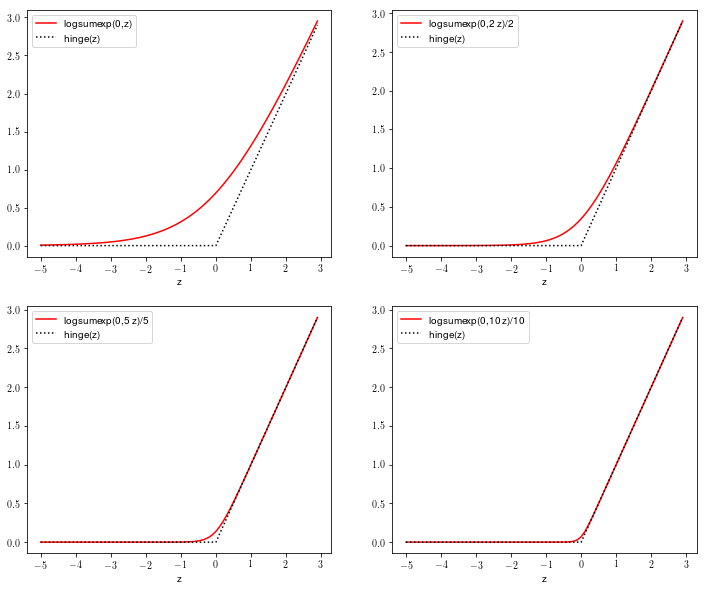

In [6]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt

def logsumexp(a,b):
    m = np.max([a,b])
    return m + np.log(np.exp(a-m) + np.exp(b-m))

def hinge(x):
    return x if x>0 else 0

xx = np.arange(-5,3,0.1)

plt.figure(figsize=(12,10))
for i,alpha in enumerate([1,2,5,10]):
    f = [logsumexp(0, alpha*z)/alpha for z in xx]
    h = [hinge(z) for z in xx]
    
    plt.subplot(2,2,i+1)
    plt.plot(xx, f, 'r')
    plt.plot(xx, h, 'k:')
    plt.xlabel('z')
    #plt.title('a = '+ str(alpha))
    if alpha==1:
        plt.legend([ 'logsumexp(0,z)','hinge(z)' ], loc=2 )    
    else:
        plt.legend([ 'logsumexp(0,{a} z)/{a}'.format(a=alpha),'hinge(z)' ], loc=2 )

    
    
plt.show()

The resemblance of the logsumexp function to an hinge function provides a nice interpretation of the log likelihood. Consider the negative log likelihood written in terms of the contributions of each single item:

$$
- \mathcal{L}(\pi) = - \sum_i l_i(w) 
$$

We denote the inner product of the features of item $i$ and the parameters as $z_i = x_i^\top w$.

Then define the 'error' made on a single item as the minus likelihood
$$
E_i(w) \equiv -l_i(w) = - y_i x_i^\top w + \text{logsumexp}(0, x_i^\top w) = - y_i z_i + \text{logsumexp}(0, z_i)
$$

Suppose, the target class $y_i = 1$. When $z_i \gg 0$, the item $i$ will be classified correctly and won't contribute to the total error as $-l_i(w) \approx 0$. However, when $z_i \ll 0$, the $\text{logsumexp}$ term will be zero and this will incur an error of $-z_i$. If instead the true target would have been $y_i = 0$ the error reduces to
$E_i(w) \approx \text{logsumexp}(0, z_i)$, incurring no error when $z_i \ll 0$ and incuring an error of approximately $z_i$ when $z_i \gg 0$. 

Below, we show the error for a range of outputs $z_i = x_i^\top w$ when the target is $1$ or $0$. When the target is $y=1$, we penalize each negative output, if the target is $y =0$ positive outputs are penalized.

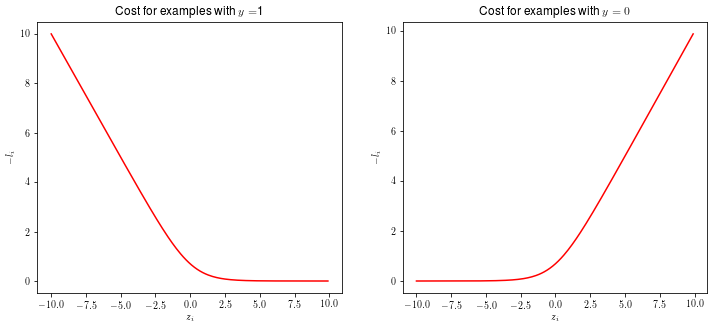

In [7]:
xx = np.arange(-10,10,0.1)
y = 1
f = [-y*z + logsumexp(0, z) for z in xx]
f0 = [logsumexp(0, z) for z in xx]

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(xx, f, 'r')
plt.xlabel('$z_i$')
plt.ylabel('$-l_i$')
plt.title('Cost for examples with $y = $'+str(y))
plt.subplot(1,2,2)
plt.plot(xx, f0, 'r')
plt.xlabel('$z_i$')
plt.ylabel('$-l_i$')
plt.title('Cost for examples with $y = 0$')

plt.show()



### Properties of the logsumexp function

If 
$$
f(z) = \text{logsumexp}(0, z) = \log(1 + \exp(z))
$$
The derivative is
$$
\frac{df(z)}{dz} = \frac{\exp(z)}{1 + \exp(z)} = \sigma(z)
$$

When $z$ is a vector, $f(z)$ is a vector. The derivative of
$$
\sum_i f(z_i) = \mathbf{1}^\top f(z)
$$

$$
\frac{d \mathbf{1}^\top f(z)}{dz} = \left(\begin{array}{c} \sigma(z_1) \\ \vdots \\ \sigma(z_N) \end{array} \right) \equiv \sigma(z)
$$
where the sigmoid function $\sigma$ is applied elementwise to $z$.

### Properties of the sigmoid function
Note that

\begin{eqnarray}
\sigma(x) & = & \frac{e^x}{(1+e^{-x})e^x} = \frac{e^x}{1+e^{x}} \\
1 - \sigma(x) & = & 1 - \frac{e^x}{1+e^{x}} = \frac{1+e^{x} - e^x}{1+e^{x}} = \frac{1}{1+e^{x}}
\end{eqnarray}

\begin{eqnarray}
\sigma'(x) & = & \frac{e^x(1+e^{x}) - e^{x} e^x}{(1+e^{x})^2} = \frac{e^x}{1+e^{x}}\frac{1}{1+e^{x}} = \sigma(x) (1-\sigma(x))
\end{eqnarray}

\begin{eqnarray}
\log \sigma(x) & = & -\log(1+e^{-x}) = x - \log(1+e^{x}) \\
\log(1 - \sigma(x)) & = &  -\log({1+e^{x}})
\end{eqnarray}




Exercise: Plot the sigmoid function and its derivative.

Exercise: Show that 
$\tanh(z) = 2\sigma(2z) - 1$

Solve 

$$
\text{maximize}\; \mathcal{L}(w)
$$

### Optimization via gradient ascent

One way for
optimization is gradient ascent
\begin{eqnarray}
w^{(\tau)} & \leftarrow & w^{(\tau-1)} + \eta \nabla_w {\cal L}
\end{eqnarray}
where
\begin{eqnarray}
\nabla_w {\cal L} & = &
\begin{pmatrix}
{\partial {\cal L}}/{\partial w_1} \\
{\partial {\cal L}}/{\partial w_2} \\
\vdots \\
{\partial {\cal L}}/{\partial w_{D}}
\end{pmatrix}
\end{eqnarray}
is the gradient vector and $\eta$ is a learning rate.

#### Evaluating the gradient (Short Derivation)

$$
\mathcal{L}(w) = y^\top X w - \mathbf{1}^\top \text{logsumexp}(0, X w)
$$

$$
\frac{d\mathcal{L}(w)}{dw} = X^\top y - X^\top \sigma(X w) = X^\top (y -\sigma(X w))
$$

#### Evaluating the gradient (Long Derivation)
The partial derivative of the loglikelihood with respect to the $k$'th entry of the weight vector is given by the chain rule as
\begin{eqnarray}
\frac{\partial{\cal L}}{\partial w_k} & = & \frac{\partial{\cal L}}{\partial \sigma(u)} \frac{\partial \sigma(u)}{\partial u} \frac{\partial u}{\partial w_k}
\end{eqnarray}

\begin{eqnarray}
{\cal L}(w) & = & \sum_{i : y_i=1} \log \sigma(w^\top x_i) + \sum_{i : y_i=0} \log (1- \sigma(w^\top x_i))
\end{eqnarray}

\begin{eqnarray}
\frac{\partial{\cal L}(\sigma)}{\partial \sigma} & = &  \sum_{i : y_i=1} \frac{1}{\sigma(w^\top x_i)} - \sum_{i : y_i=0} \frac{1}{1- \sigma(w^\top x_i)}
\end{eqnarray}

\begin{eqnarray}
\frac{\partial \sigma(u)}{\partial u} & = & \sigma(w^\top x_i) (1-\sigma(w^\top x_i))
\end{eqnarray}

\begin{eqnarray}
\frac{\partial w^\top x_i }{\partial w_k} & = & x_{i,k}
\end{eqnarray}


So the gradient is
\begin{eqnarray}
\frac{\partial{\cal L}}{\partial w_k} & = & \sum_{i : y_i=1} \frac{\sigma(w^\top x_i) (1-\sigma(w^\top x_i))}{\sigma(w^\top x_i)} x_{i,k} - \sum_{i : y_i=0} \frac{\sigma(w^\top x_i) (1-\sigma(w^\top x_i))}{1- \sigma(w^\top x_i)} x_{i,k} \\
& = & \sum_{i : y_i=1} {(1-\sigma(w^\top x_i))} x_{i,k} - \sum_{i : y_i=0} {\sigma(w^\top x_i)} x_{i,k}
\end{eqnarray}

We can write this expression more compactly by noting
\begin{eqnarray}
\frac{\partial{\cal L}}{\partial w_k} & = & \sum_{i : y_i=1} {(\underbrace{1}_{y_i}-\sigma(w^\top x_i))} x_{i,k} + \sum_{i : y_i=0} {(\underbrace{0}_{y_i} - \sigma(w^\top x_i))} x_{i,k} \\
& = & \sum_i (y_i - \sigma(w^\top x_i)) x_{i,k}
\end{eqnarray}

$\newcommand{\diag}{\text{diag}}$

## Test on a synthetic problem

We generate a random dataset and than try to learn to classify this dataset


In [8]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt

# Generate a random logistic regression problem

def sigmoid(t):
    return np.exp(t)/(1+np.exp(t))


def generate_toy_dataset(number_of_features=3, number_of_datapoints=20, styles = ['ob', 'xr']):

    D = number_of_features
    N = number_of_datapoints
    

    # Some random features
    X = 2*np.random.rand(N,D)-1
    X[:,0] = 1

    # Generate a random paramater vector
    w_true = np.random.randn(D,1)

    # Generate class labels
    pi = sigmoid(np.dot(X, w_true))
    y = np.array([1 if u else 0 for u in np.random.rand(N,1) < pi]).reshape((N))

    return X, y, w_true, D, N

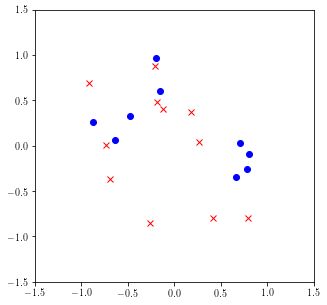

In [9]:
styles = ['ob', 'xr']
X, y, w_true, D, N = generate_toy_dataset(number_of_features=3, number_of_datapoints=20, styles=styles)

xl = -1.5; xr = 1.5; yl = -1.5; yr = 1.5

fig = plt.figure(figsize=(5,5))
plt.plot(X[y==1,1],X[y==1,2],styles[1])
plt.plot(X[y==0,1],X[y==0,2],styles[0])

ax = fig.gca()
ax.set_ylim([yl, yr])
ax.set_xlim([xl, xr])
plt.show()

In [10]:
# Implement Gradient Descent
w = np.random.randn(D)

# Learnig rate
eta = 0.05

W = []
MAX_ITER = 200
for epoch in range(MAX_ITER):
    W.append(w)
    dL = np.dot(X.T, y-sigmoid(np.dot(X,w)))
    w = w + eta*dL


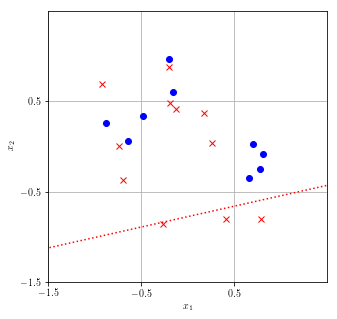

<function __main__.plot_boundry_of_weight>

In [12]:
xl = -1.5
xr = 1.5
yl = -1.5
yr = 1.5

fig = plt.figure(figsize=(5,5))
ax = fig.gca()
ax.set_ylim([yl, yr])
ax.set_xlim([xl, xr])

plt.plot(X[y==1,1],X[y==1,2],styles[1])
plt.plot(X[y==0,1],X[y==0,2],styles[0])


ln = plt.Line2D([],[],color='k')
ln_left  = plt.Line2D([],[],ls= ':', color=styles[0][1])
ln_right = plt.Line2D([],[],ls= ':', color=styles[1][1])

ax.add_line(ln)
ax.add_line(ln_left)
ax.add_line(ln_right)
plt.close(fig)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_xticks(np.arange(xl,xr))
ax.set_yticks(np.arange(yl,yr))
ax.grid(True)
def plot_boundry(w0,w1,w2):
    if w1 != 0:
        xa = -(w0+w2*yl)/w1
        xb = -(w0+w2*yr)/w1
        ln.set_xdata([xa, xb])
        ln.set_ydata([yl, yr])

        xa = -(-inv_sigmoid(0.25) + w0+w2*yl)/w1
        xb = -(-inv_sigmoid(0.25) + w0+w2*yr)/w1
        ln_left.set_xdata([xa, xb])
        ln_left.set_ydata([yl, yr])

        xa = -(-inv_sigmoid(0.75) + w0+w2*yl)/w1
        xb = -(-inv_sigmoid(0.75) + w0+w2*yr)/w1
        ln_right.set_xdata([xa, xb])
        ln_right.set_ydata([yl, yr])
        
        
    elif w2!=0:
        ya = -(w0+w1*xl)/w2
        yb = -(w0+w1*xr)/w2
        ln.set_xdata([xl, xr])
        ln.set_ydata([ya, yb])

        ya = -(-inv_sigmoid(0.25) + w0+w1*xl)/w2
        yb = -(-inv_sigmoid(0.25) + w0+w1*xr)/w2
        ln_left.set_xdata([xl, xr])
        ln_left.set_ydata([ya, yb])

        ya = -(-inv_sigmoid(0.75) + w0+w1*xl)/w2
        yb = -(-inv_sigmoid(0.75) + w0+w1*xr)/w2
        ln_right.set_xdata([xl, xr])
        ln_right.set_ydata([ya, yb])      
        
    else:
        ln.set_xdata([])
        ln.set_ydata([])
        
    display(fig)

def plot_boundry_of_weight(iteration=0):
    i = iteration
    w = W[i]
    plot_boundry(w[0],w[1],w[2])
    
interact(plot_boundry_of_weight, iteration=(0,len(W)-1))

## Second order optimization

Newton's method

#### Evaluating the Hessian

The Hessian is 
\begin{eqnarray}
\frac{\partial^2{\cal L}}{\partial w_k \partial w_r} & = & - \sum_i (1-\sigma(w^\top x_i)) \sigma(w^\top x_i) x_{i,k} x_{i,r} \\
\pi & \equiv & \sigma(X w) \\
\nabla \nabla^\top \mathcal{L}& = & -X^\top \diag(\pi(1 - \pi)) X 
\end{eqnarray}


The update rule is
\begin{eqnarray}
w^{(\tau)} = w^{(\tau-1)} + \eta X^\top (y-\sigma(X w))
\end{eqnarray}

[0 1]
[2 3 4]


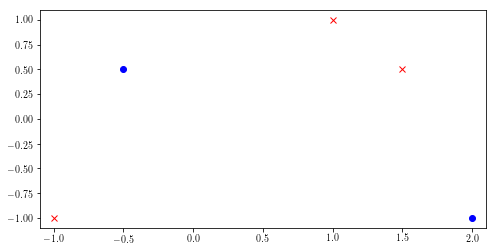

In [339]:
#x = np.matrix('[-2,1; -1,2; 1,5; -1,1; -3,-2; 1,1] ')
x = np.matrix('[-0.5,0.5;2,-1;-1,-1;1,1;1.5,0.5]')
#y = np.matrix('[0,0,1,0,0,1]').T
y = np.matrix('[0,0,1,1,1]').T
N = x.shape[0]
#A = np.hstack((np.power(x,0), np.power(x,1), np.power(x,2)))
#X = np.hstack((x, np.ones((N,1)) ))
X = x

def sigmoid(x):
    return 1/(1+np.exp(-x))


idx = np.nonzero(y)[0]
idxc = np.nonzero(1-y)[0]

fig = plt.figure(figsize=(8,4))
plt.plot(x[idx,0], x[idx,1], 'rx')
plt.plot(x[idxc,0], x[idxc,1], 'bo')
fig.gca().set_xlim([-1.1,2.1])
fig.gca().set_ylim([-1.1,1.1])
print(idxc)
print(idx)

plt.show()

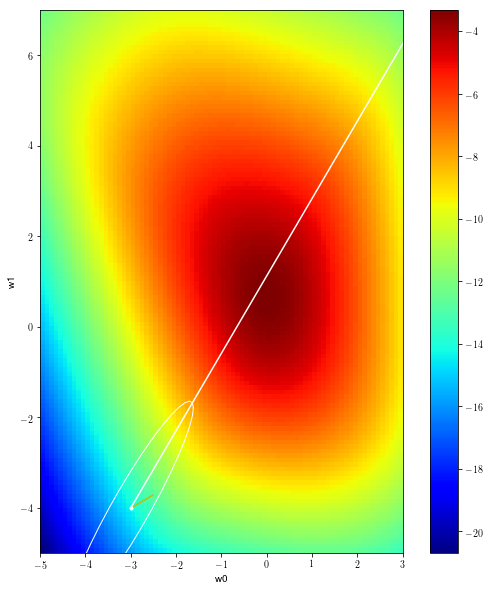

In [341]:
from itertools import product

def ellipse_line(A, mu, col='b'):
    '''
    Creates an ellipse from short line segments y = A x + \mu 
    where x is on the unit circle.
    '''
    N = 18
    th = np.arange(0, 2*np.pi+np.pi/N, np.pi/N)
    X = np.mat(np.vstack((np.cos(th),np.sin(th))))
    
    Y = A*X
    ln = plt.Line2D(mu[0]+Y[0,:],mu[1]+Y[1,:],markeredgecolor='w', linewidth=1, color=col)
    return ln


left = -5
right = 3
bottom = -5
top = 7
step = 0.1
W0 = np.arange(left,right, step)
W1 = np.arange(bottom,top, step)

LLSurf = np.zeros((len(W1),len(W0)))

# y^\top X w - \mathbf{1}^\top \text{logsumexp}(0, X w)
vmax = -np.inf
vmin = np.inf
for i,j in product(range(len(W1)), range(len(W0))):
    w = np.matrix([W0[j], W1[i]]).T
    p = X*w
    ll = y.T*p - np.sum(np.log(1+np.exp(p)))
    
    vmax = np.max((vmax, ll))
    vmin = np.min((vmin, ll))
    
    LLSurf[i,j] = ll

fig = plt.figure(figsize=(10,10))
plt.imshow(LLSurf, interpolation='nearest', 
           vmin=vmin, vmax=vmax,origin='lower',
           extent=(left,right,bottom,top),cmap=plt.cm.jet)
plt.xlabel('w0')
plt.ylabel('w1')
plt.colorbar()


W0 = np.arange(left+2,right-5, 12*step)
W1 = np.arange(bottom+1,top-10, 12*step)

for i,j in product(range(len(W1)), range(len(W0))):
    w = np.matrix([W0[j], W1[i]]).T
    #w = np.mat([-1,1]).T

    p = sigmoid(X*w)
    dw = 0.2*X.T*(y-p)
    #print(p)
    S = np.mat(np.diag(np.asarray(np.multiply(p,1-p)).flatten()))
    H = X.T*S*X
    dw_nwt = 0.08*H.I*X.T*(y-p)

    C = np.linalg.cholesky(H.I)
#    plt.hold(True)
    ln = ellipse_line(C/3., w, 'w')
    ax = fig.gca()
    ax.add_line(ln)
    ln2 = plt.Line2D((float(w[0]), float(w[0]+dw[0])), (float(w[1]), float(w[1]+dw[1])),color='y')
    ax.add_line(ln2)
    ln3 = plt.Line2D((float(w[0]), float(w[0]+dw_nwt[0])), (float(w[1]), float(w[1]+dw_nwt[1])),color='w')
    ax.add_line(ln3)
    plt.plot(w[0,0],w[1,0],'.w')

    
    
    #print(C)
    #print(S)

ax.set_xlim((left,right))
ax.set_ylim((bottom,top))
plt.show()

In [114]:
print(y)
print(X)

#w = np.random.randn(3,1)

w = np.mat('[1;2]')

print(w)

print(sigmoid(X*w))
eta = 0.1

for i in range(10000):
    pr = sigmoid(X*w)
    w = w + eta*X.T*(y-pr)
    
print(np.hstack((y,pr)))
print(w)

[[0]
 [0]
 [1]
 [1]
 [1]]
[[-0.5  0.5]
 [ 2.  -1. ]
 [-1.  -1. ]
 [ 1.   1. ]
 [ 2.   1. ]]
[[1]
 [2]]
[[ 0.62245933]
 [ 0.5       ]
 [ 0.04742587]
 [ 0.95257413]
 [ 0.98201379]]
[[ 0.          0.59561717]
 [ 0.          0.30966921]
 [ 1.          0.32737446]
 [ 1.          0.67262554]
 [ 1.          0.66660954]]
[[-0.02719403]
 [ 0.74727817]]


---------------------------
# Optimization Frameworks
---------------------------
## CVX -- Convex Optimization

CVX is a framework that can be used for solving convex optimization problems. 

Convex optimization includes many problems of interest; for example the minimization of the negative loglikelihood of the logistic regression is a convex problem. S

Unfortunately, many important problems and interesting problems 

In [ ]:
%matplotlib inline
from cvxpy import *
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt

### Selecting relevant features with regularization

Below we generate a dataset with some irrelevant features that are not informative for classification

Maximize

$$
\mathcal{L}(w) + \lambda \|w\|_p
$$

In [380]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Number of data points
N = 1000

# Number of relevant features
K = 10

# Number of irrelevant features
Ke = 30

# Generate random features
X = np.matrix(np.random.randn(N, K + Ke))

# Generate parameters and set the irrelevant ones to zero
w_true = np.random.randn(K + Ke,1)
w_true[K:] = 0

p = sigmoid(X*w_true)
u = np.random.rand(N,1)
y = (u < p)
y = y.astype(np.float64)


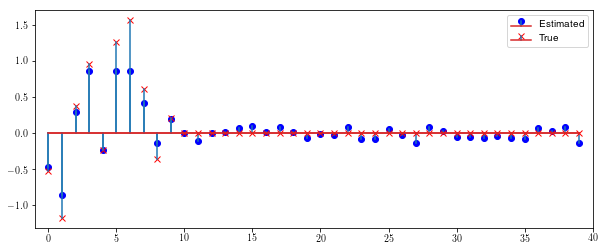

In [389]:
# Regularization coefficient
lam = 100.

zero_vector = np.zeros((N,1))
# Construct the problem.
w = Variable(K+Ke)
objective = Minimize(lam*norm(w, np.inf ) -y.T*X*w + sum_entries(log_sum_exp(hstack(zero_vector, X*w),axis=1)))
prob = Problem(objective)

# The optimal objective is returned by prob.solve().
result = prob.solve()

# The optimal value for x is stored in x.value.
#print(w.value)

plt.figure(figsize=(10,4))
plt.stem(w.value, markerfmt='ob')
plt.stem(w_true, markerfmt='xr')
plt.gca().set_xlim((-1, K+Ke))
plt.legend(['Estimated', 'True'])
plt.show()



## Optimization with pytorch

In [123]:
X_np, y_np, w_true_np, M, N = generate_toy_dataset(number_of_features=3, number_of_datapoints=20)

### Gradient Descent for Logistic Regression: Reference implementation in numpy

In [124]:
# Initialization 
w_np = np.ones(M)

# Learnig rate
eta = 0.01
MAX_ITER = 100

for epoch in range(MAX_ITER):
    sig = sigmoid(np.dot(X_np,w_np))

    # Gradient dLL/dw -- symbolically derived and hard coded
    w_grad = np.dot(X_np.T, y_np-sig)
    
    # Gradient ascent step
    w_np = w_np + eta*w_grad

print(w_np)

[-0.96195283 -0.21886467  0.83477378]


### Gradient Descent for Logistic Regression: First implementation in pytorch

In [125]:
import torch
import torch.autograd
from torch.autograd import Variable

#sigmoid_f = torch.nn.Sigmoid()
def sigmoid_f(x):
    return 1./(1. + torch.exp(-x))

X = Variable(torch.from_numpy(X_np).double())
y = Variable(torch.from_numpy(y_np.reshape(N,1)).double())

In [126]:
# Implementation 
w = Variable(torch.ones(M,1).double(), requires_grad=True)

eta = 0.01
MAX_ITER = 100
for epoch in range(MAX_ITER): 
    sig = sigmoid_f(torch.matmul(X, w))

    # Compute the loglikelihood
    LL = torch.sum(y*torch.log(sig) + (1-y)*torch.log(1-sig))    
    # Compute the gradients by automated differentiation
    LL.backward()
    
    # The gradient ascent step
    w.data.add_(eta*w.grad.data)
    
    # Reset the gradients, as otherwise they are accumulated in w.grad
    w.grad.zero_() 
    
print(w.data.numpy())

[[-0.96195283]
 [-0.21886467]
 [ 0.83477378]]


In [334]:
%connect_info

{
  "shell_port": 65415,
  "iopub_port": 65416,
  "stdin_port": 65417,
  "control_port": 65418,
  "hb_port": 65419,
  "ip": "127.0.0.1",
  "key": "40c24992-b940437a6d68edf64080bfde",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-ab030b1c-c549-4b31-8e5e-c11e1befeaa2.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
